### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гебриал Ибрам Есам Зекри
##### Группа:   НПИбд-01-18

## Москва 2021
***

### Вариант № 21


Arrhythmia Data Set 

Название файла: arrhythmia.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Первый признак: Q wave of channel DI (столбец No 161) 

Второй признак: R wave of channel DI (столбец No 162) 

Третий признак: S wave of channel DI (столбец No 163) 

Класс: Sex (столбец No 2) 


1.         Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

 

2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.

 

3.         Масштабируйте признаки набора данных на интервал от 0 до 1.

 

4.         Визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

 

5.         Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью наивного байесовского классификатора.

 

6.         Постройте и выведите на экран отчет о классификации и матрицу ошибок.

 

7.         Найдите точность классификации набора данных при помощи наивного байесовского классификатора методом кросс-валидации по 5 блокам.

 

8.         Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.

 

9.         Найдите точность классификации набора данных при помощи метода К ближайших соседей для найденного значения К методом кросс-валидации по 5 блокам.

 

10.       Определите, какой из методов классификации позволяет получить более высокую точность классификации набора данных при кросс-валидации по 5 блокам.

 

11.       Проведите классификацию точек набора данных лучшим методом и визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

#### 1.Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса

In [1]:
from urllib.request import urlopen
from contextlib import closing
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
# считываем данные в объект DataFrame
my_data = pd.read_csv( url,sep="," ,header=None,usecols=[160, 161, 162, 1],prefix="V" )
                        
#print( "\n*** Начало данных:\n", my_data.head() ) # начальные данные
#print( "\n*** Конец данных:\n",  my_data.tail() ) # конечные данные

#summary = my_data.describe()                      # сводка данных 
#print( "\n*** Сводка данных:\n", summary)

In [3]:
my_data

,V1,V160,V161,V162
0,0,0.0,6.1,-1.0
1,1,0.0,7.2,0.0
2,0,0.0,4.5,-2.8
3,0,0.0,7.8,-0.7
4,0,0.0,5.2,-1.4
5,0,0.0,2.7,-6.4
6,1,0.0,1.8,0.0
7,1,0.0,4.1,-1.1
8,0,0.0,2.3,0.0
9,1,0.0,3.5,-2.0


Тут я просто показал по другому 

In [4]:
print( "Признаки Q wave of channel DI: ", my_data['V160'] )
print("------------------------------------------------------------------------------")
print( "Признаки R wave of channel DI: ", my_data['V161'] )
print("------------------------------------------------------------------------------")

print( "Признаки S wave of channel DI: ", my_data['V162'] )
print("------------------------------------------------------------------------------")
print( "Метки: ", my_data.V1)

Признаки Q wave of channel DI:  0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10    -0.5
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20    -0.4
21     0.0
22     0.0
23     0.0
24     0.0
25    -0.6
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
422    0.0
423    0.0
424    0.0
425    0.0
426    0.0
427    0.0
428    0.0
429    0.0
430    0.0
431    0.0
432    0.0
433    0.0
434   -0.5
435    0.0
436   -0.7
437    0.0
438   -0.6
439    0.0
440    0.0
441    0.0
442   -0.6
443    0.0
444    0.0
445    0.0
446    0.0
447    0.0
448    0.0
449   -0.4
450    0.0
451    0.0
Name: V160, Length: 452, dtype: float64
------------------------------------------------------------------------------
Признаки R wave of channel DI:  0       6.1
1       7.2
2       4.5
3       7.8
4       5.2
5       2.7
6       1.8
7       4.1
8       2.3
9       3.5
10      5.8
11      6.1
12

#### 2.Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 4 columns):
V1      452 non-null int64
V160    452 non-null float64
V161    452 non-null float64
V162    452 non-null float64
dtypes: float64(3), int64(1)
memory usage: 14.2 KB


In [6]:
my_data = my_data.replace('?',np.NaN) # заменить '?' на np.NaN
print('Число отсутствующих значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Число отсутствующих значений:
	V1: 0
	V160: 0
	V161: 0
	V162: 0


У меня нет пропущенных значений

#### 3.Масштабируйте признаки набора данных на интервал от 0 до 1

In [7]:
import numpy as np
XX = my_data[['V160', 'V161', 'V162']]
Scaler= MinMaxScaler()
XX = Scaler.fit_transform(XX)
#X = np.array(my_data)
XX[:,0] = (XX[:,0] - np.min(XX[:,0])) / (np.max(XX[:,0]) - np.min(XX[:,0]))
XX[:,1] = (XX[:,1] - np.min(XX[:,1])) / (np.max(XX[:,1]) - np.min(XX[:,1]))
XX[:,2] = (XX[:,2] - np.min(XX[:,2])) / (np.max(XX[:,2]) - np.min(XX[:,2]))

XX

array([[1.        , 0.30653266, 0.92753623],
       [1.        , 0.36180905, 1.        ],
       [1.        , 0.22613065, 0.79710145],
       ...,
       [0.85185185, 0.42211055, 0.57971014],
       [1.        , 0.26130653, 1.        ],
       [1.        , 0.51758794, 0.87681159]])

In [17]:
from sklearn.preprocessing import MinMaxScaler

XX = my_data[['V160', 'V161', 'V162']]

np.set_printoptions(precision=3)

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(XX)

my_data2 = pd.DataFrame(rescaledX, columns = ['V160', 'V161', 'V162'])
my_data2['V1'] = my_data['V1']

my_data2

,V160,V161,V162,V1
0,1.000000,0.306533,0.927536,0
1,1.000000,0.361809,1.000000,1
2,1.000000,0.226131,0.797101,0
3,1.000000,0.391960,0.949275,0
4,1.000000,0.261307,0.898551,0
5,1.000000,0.135678,0.536232,0
6,1.000000,0.090452,1.000000,1
7,1.000000,0.206030,0.920290,1
8,1.000000,0.115578,1.000000,0
9,1.000000,0.175879,0.855072,1


#### 4.Визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных

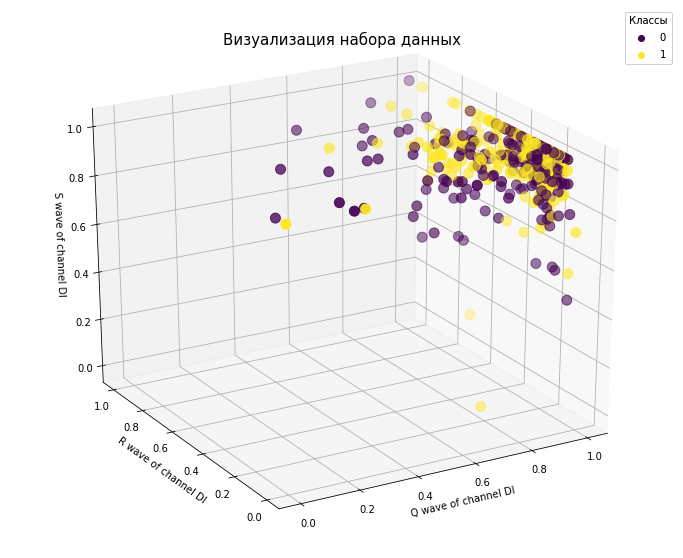

In [13]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xx = rescaledX[:,0]
yy = rescaledX[:,1]
zz = rescaledX[:,2]

scatter = ax.scatter( xx, yy, zz, c=my_data["V1"].astype(int),s=100 )
ax.set_title('Визуализация набора данных',fontsize=15)
ax.set_xlabel('Q wave of channel DI')
ax.set_ylabel('R wave of channel DI')
ax.set_zlabel('S wave of channel DI')
ax.view_init( azim=-120, elev=25 )

legen = ax.legend(*scatter.legend_elements(), title = "Классы")
ax.add_artist(legen)
plt.show()


#### 5.Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью наивного байесовского классификатора.

In [18]:
X = my_data2.drop('V1',axis=1)
y = my_data2['V1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 3), (113, 3), (339,), (113,))

In [19]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train);

In [20]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Количество неправильно классифицированных точек из {} точек тестового множества равно {}".format(len(y_test),mislabel))

Количество неправильно классифицированных точек из 113 точек тестового множества равно 54


#### 6.Постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [21]:
from sklearn.metrics import classification_report
print("Отчет о классификации:\n")
print(classification_report(y_test,y_pred))

Отчет о классификации:

              precision    recall  f1-score   support

           0       0.33      0.10      0.16        49
           1       0.55      0.84      0.67        64

    accuracy                           0.52       113
   macro avg       0.44      0.47      0.41       113
weighted avg       0.46      0.52      0.45       113



In [22]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Класс 1','Класс 2'], columns=['Класс 1','Класс 2'])
print("Матрица ошибок:\n")
cmdf

Матрица ошибок:



,Класс 1,Класс 2
Класс 1,5,44
Класс 2,10,54


#### 7.Найдите точность классификации набора данных при помощи наивного байесовского классификатора методом кросс-валидации по 5 блокам.

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
kfold = KFold(n_splits=num_folds)

In [24]:
# разбиение на выборки
splits = kfold.split(X)

# Кол-во точек в выборках
for train_index, val_index in splits:
    print("Кол-во точек в обучающей выборке: %s, тестовой выборке: %s" % (len(train_index),len(val_index)))

Кол-во точек в обучающей выборке: 361, тестовой выборке: 91
Кол-во точек в обучающей выборке: 361, тестовой выборке: 91
Кол-во точек в обучающей выборке: 362, тестовой выборке: 90
Кол-во точек в обучающей выборке: 362, тестовой выборке: 90
Кол-во точек в обучающей выборке: 362, тестовой выборке: 90


In [31]:
results = cross_val_score(nbc, X, y, cv=kfold)
results

array([0.659, 0.593, 0.633, 0.478, 0.533])

In [32]:
print("Точность: {:.3f} ({:.3f})".format(results.mean()*100.0, results.std()*100.0))

Точность: 57.944 (6.625)


#### 8.Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("Лучшее k =", best_k)
print("Лучшая оценка =", best_score)

Лучшее k = 1
Лучшая оценка = 0.584070796460177


#### 9.Найдите точность классификации набора данных при помощи метода К ближайших соседей для найденного значения К методом кросс-валидации по 5 блокам.

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
kfold = KFold(n_splits=num_folds)

In [100]:
kNN_clf = KNeighborsClassifier(n_neighbors=1)         

In [101]:
# разбиение на выборки
splits = kfold.split(X)

# Кол-во точек в выборках
for train_index, val_index in splits:
    print("Кол-во точек в обучающей выборке: %s, тестовой выборке: %s" % (len(train_index),len(val_index)))

Кол-во точек в обучающей выборке: 361, тестовой выборке: 91
Кол-во точек в обучающей выборке: 361, тестовой выборке: 91
Кол-во точек в обучающей выборке: 362, тестовой выборке: 90
Кол-во точек в обучающей выборке: 362, тестовой выборке: 90
Кол-во точек в обучающей выборке: 362, тестовой выборке: 90


In [102]:
results = cross_val_score(kNN_clf, X, y, cv=kfold)
results

array([0.615, 0.549, 0.522, 0.544, 0.556])

In [103]:
print("Точность: {:.3f} ({:.3f})".format(results.mean()*100.0, results.std()*100.0))

Точность: 55.741 (3.109)


#### 10.Определите, какой из методов классификации позволяет получить более высокую точность классификации набора данных при кросс-валидации по 5 блокам.

При помощи наивного байесовского классификатора получил более высокую точность классификации Точность: 57.944 (6.625)

#### 11.Проведите классификацию точек набора данных лучшим методом и визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных

In [39]:
nbc = GaussianNB()
nbc.fit(X_train,y_train);
y_pred = nbc.predict(X)

y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

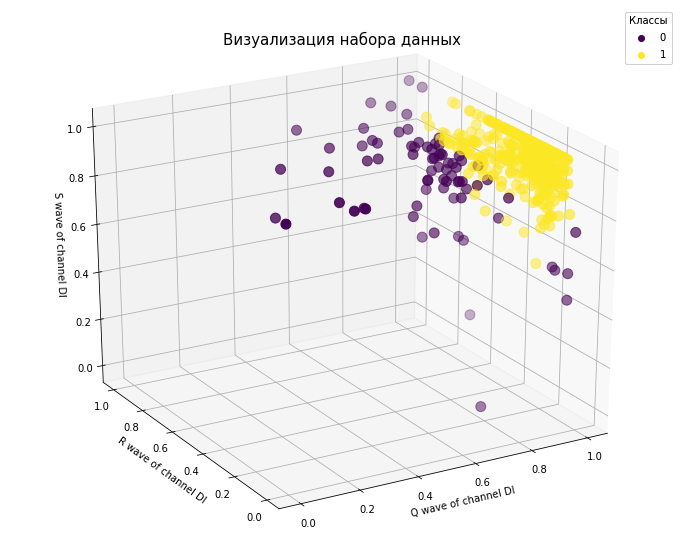

In [40]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
xx = X["V160"]
yy = X["V161"]
zz = X["V162"]
ax.scatter(  xx, yy, zz, c=y_pred,s=100 )
ax.set_title('Визуализация набора данных',fontsize=15)
ax.set_xlabel('Q wave of channel DI')
ax.set_ylabel('R wave of channel DI')
ax.set_zlabel('S wave of channel DI')
ax.view_init( azim=-120, elev=25 )
legen = ax.legend(*scatter.legend_elements(), title = "Классы")
ax.add_artist(legen)
plt.show()


